# Introduction 

In the following notebook, I will be exploring 2020_0505_Cleaned_Energy_Dataset.csv and the 2020_0505_Cleaned_Weather_Features.csv data files which contain time series data pertaining to energy consumption and weather in Spain respectively. In this notebook, I intend to find features and relationships worthy of exploring further with times series modeling techniques.

* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)
* Original raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)

**Read in libraries for notebook**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [2]:
#Set preferences for pandas 
pd.set_option("display.max_columns", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')
font_title = {'fontsize' : 16, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0514_Weather_Energy.csv', 
                 parse_dates=['date_time','date'], dtype={'year':'category'},index_col='date_time')

# Data Overview

**Data Dictionary**

* **date_time**: Datetime index localized to CET
* **price actual**: price in EUR/MWh
* **price day ahead**: forecasted price EUR/MWh
* **total load actual**: actual electrical demand
* **total load forecast**: forecasted electrical demand
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of recording
* **month**: month of recording
* **year**: year of recording


**Data Preview**

In [4]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35072, 8)


,price_actual,temp,total_load_actual,date,time,weekday,month,year
date_time,,,,,,,,
2015-01-01 00:00:00,65.41,30.814633,25385.0,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,64.92,30.852860,24382.0,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,64.48,30.108448,22734.0,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,59.32,30.091044,21286.0,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,56.04,30.192620,20264.0,2015-01-01,04:00:00,Thursday,January,2015


**About the Data**

In [5]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
       price_actual          temp  total_load_actual
count  35072.000000  35072.000000       35072.000000
mean      57.883167     61.752442       28695.654824
std       14.202675     13.069191        4577.180735
min        9.330000     29.825352       18041.000000
25%       49.350000     51.638000       24805.000000
50%       58.020000     60.573200       28901.000000
75%       68.010000     71.479400       32194.000000
max      116.800000     97.008800       41015.000000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35072 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price_actual       35072 non-null  float64       
 1   temp               35072 non-null  float64       
 2   total_load_actual  35072 non-null  float64       
 3   date               35072 non-null  datetime64[ns]
 4   time               

**Distributions of Price, Load, and Temp

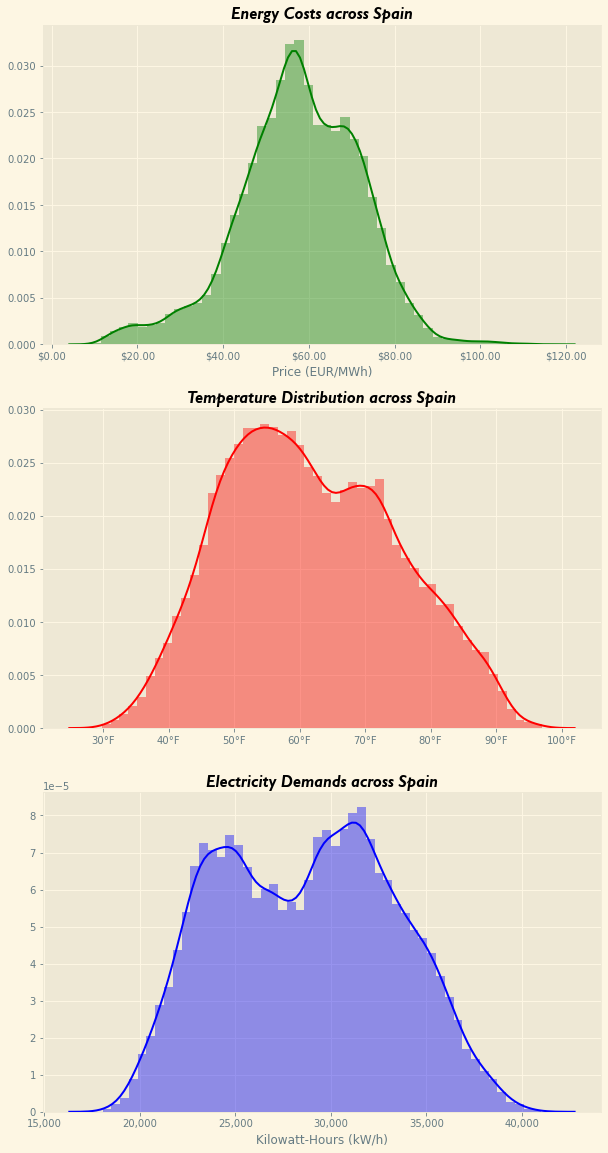

In [6]:
#Set figure
f, ax = plt.subplots(3,1, figsize = (10,20))

#Plot data
sns.distplot(df['price_actual'],color = 'g',ax=ax[0])
sns.distplot(df['temp'],color = 'r', ax=ax[1])
sns.distplot(df['total_load_actual'],color = 'b', ax = ax[2])

###Set plot aesthetics###
##Plot 1
ax[0].set_title('Energy Costs across Spain', fontdict = font_title)
ax[0].set_xlabel('Price (EUR/MWh)')
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))

#Plot 2
ax[1].set_title('Temperature Distribution across Spain', fontdict = font_title)
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
ax[1].set_xlabel('')

##Plot 3
ax[2].set_title('Electricity Demands across Spain',fontdict = font_title)
ax[2].set_xlabel('Kilowatt-Hours (kW/h)')
ax[2].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


# Exploratory Data Analysis

## Correlations

**Heat Map**

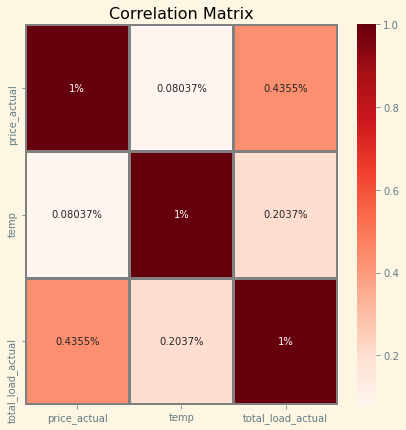

In [35]:
#Set plot
f, ax = plt.subplots(figsize = (7,7))

#Create correlation matrix
corr = df.corr()

#Create heatmap
sns.heatmap(corr, annot=True,fmt='.4g',cmap = 'Reds', linewidths=2,annot_kws=None,
            linecolor='grey', ax = ax)

###Set plot aesthetics###
#Title
ax.set_title('Correlation Matrix')

#Format annotations
for t in ax.texts: t.set_text(t.get_text() + "%")

**Pairplot**

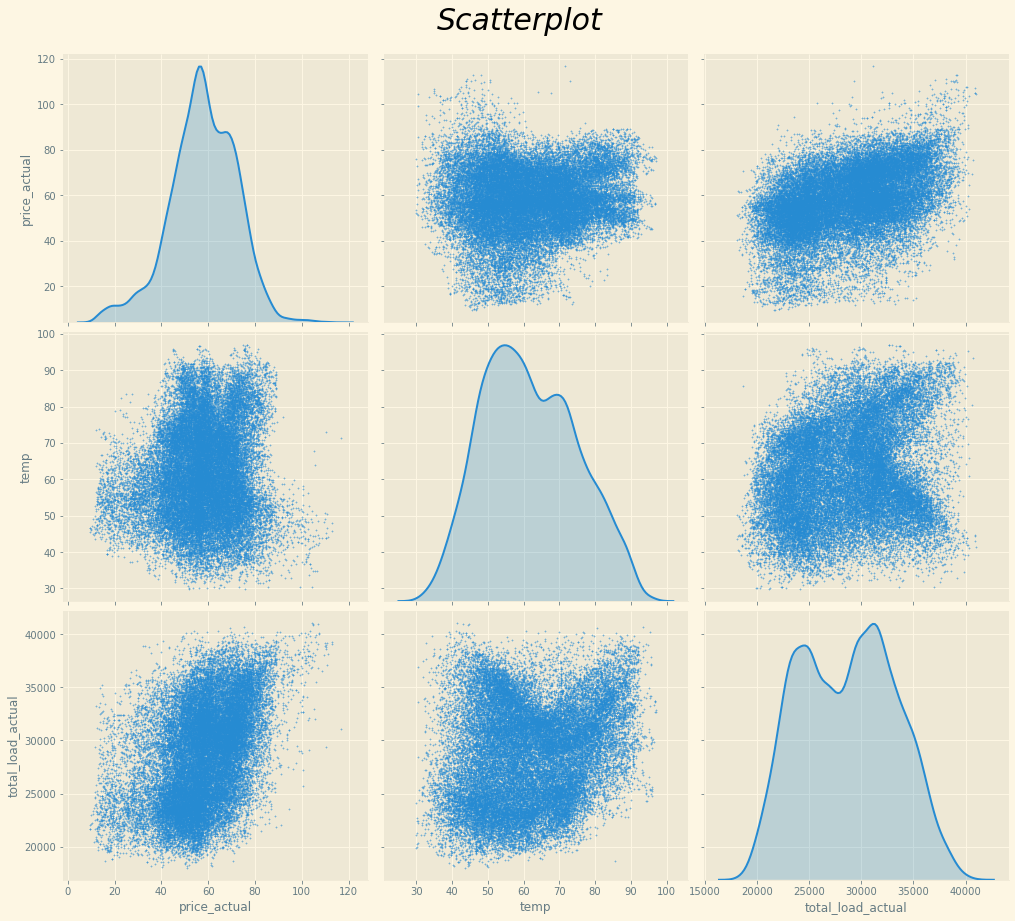

In [8]:
#Set font size for pairplot

#Plot data
j = sns.pairplot(df[['price_actual', 'temp', 'total_load_actual']],
                 plot_kws = {'alpha': 0.6, 's': 5, 'edgecolor': 'w',},
                 markers = '+',diag_kind='kde', height = 4, aspect = 1.15);

###Set plot aesthetics###
#Set Title
j.fig.suptitle("Scatterplot", y= 1.05, fontsize = 30, style = 'italic');

## Raw time plots

**Write up functions for time plots**

In [9]:
def timeseries_plot(series, figsize = None , title = None, xlabel = None, ylabel = None,legend = False,label = None,
                    title_dict = None, label_dict = None,color = None,ax=None, alpha = None):
    """
    Plot Time Series Data
    """
    plot = series.plot(color = color,label = label,alpha=alpha, ax=ax)
    plot.set_title(title, fontdict=title_dict)
    plot.set_ylabel(ylabel,fontdict=label_dict )
    plot.set_xlabel(xlabel,fontdict=label_dict)
    if legend == True:
        plot.legend(fancybox = True, shadow = True, frameon = True)
    return plot

## Price Data

**Time plots with smoothing**

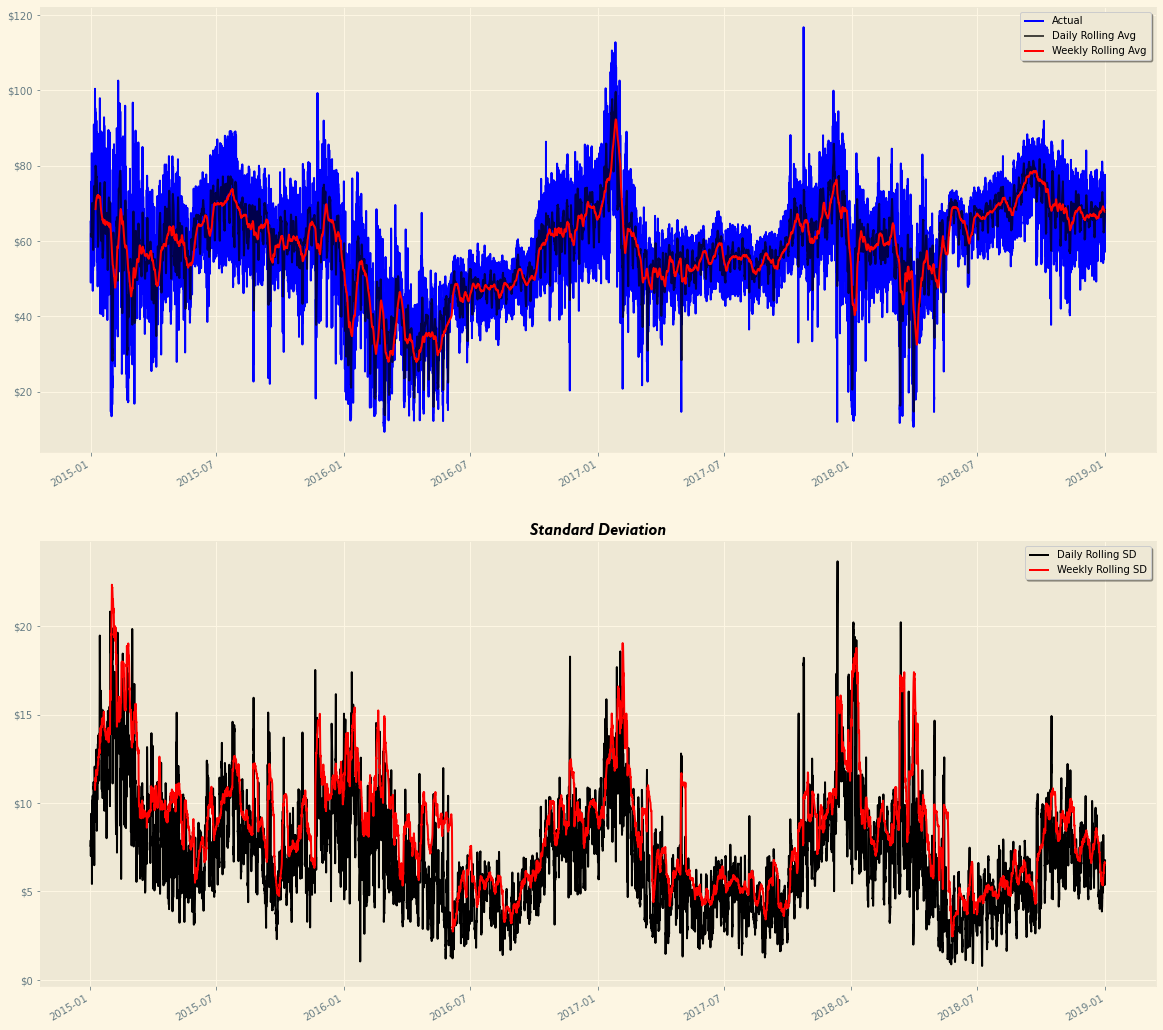

In [10]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,20))

###Plot Data###
#Raw Data
timeseries_plot(df['price_actual'],legend = True,label = 'Actual', color = 'b',ax =ax[0])

#Rolling Averages
timeseries_plot(df['price_actual'].rolling(24,24).mean(),legend = True,label = 'Daily Rolling Avg', 
                color = 'black',alpha = .7,ax =ax[0])
timeseries_plot(df['price_actual'].rolling(24*7,24*7).mean(),legend = True,label = 'Weekly Rolling Avg',
                color = 'r',ax =ax[0])

#Rolling Standard Deviations
timeseries_plot(df['price_actual'].rolling(24,24).std(), legend = True,label = 'Daily Rolling SD',
                color = 'black',ax =ax[1])
timeseries_plot(df['price_actual'].rolling(24*7,24*7).std(),title='Standard Deviation', title_dict=font_title,
                legend = True,label = 'Weekly Rolling SD',color = 'r',ax =ax[1])

###Plot Aesthetics###
#Axes
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}".format(int(x))))

**Autocorrelation Plot**

Text(0.5, 1.0, 'Price Autocorrelation')

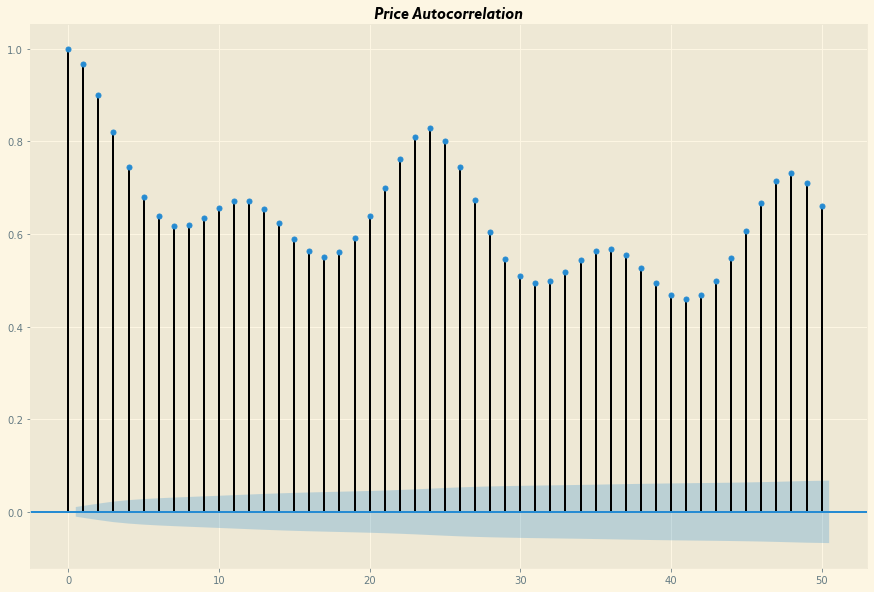

In [11]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf

#Set plot
f, ax = plt.subplots(figsize = (15,10))

#Fit to data
plot_acf(df['price_actual'], lags = 50, ax = ax),

###Set plot aesthetics###
#Title
ax.set_title('Price Autocorrelation', fontdict = font_title)

**Decomposition model**

We'll shorten dataset to 180 days to get a better view of seasonality

In [12]:
#Import decomposition model
from statsmodels.tsa.seasonal import seasonal_decompose

#Fit seasonal_decompose to data and store resutls
result = seasonal_decompose(df.price_actual.values, model='additive',freq = 24)
tightened_result = seasonal_decompose(df.price_actual.values[:24*30], model='additive',freq = 24)

trend = result.trend
noise = result.resid
observed = result.observed

seasonal = tightened_result.seasonal

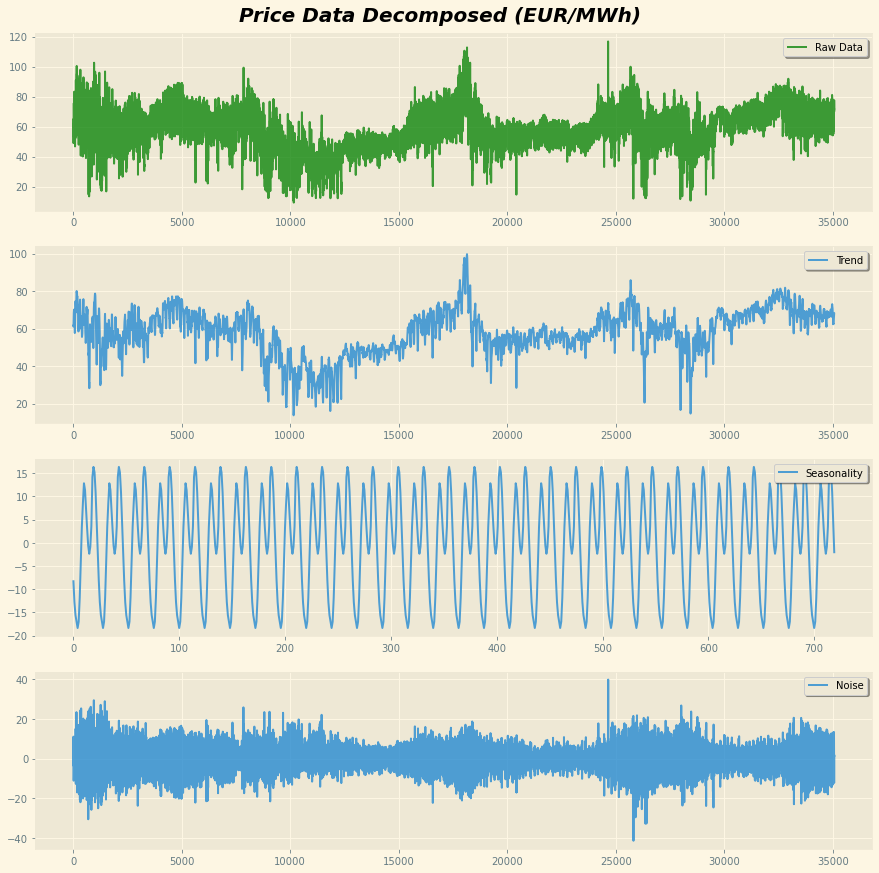

In [13]:
plt.figure(figsize=(15,15))

plt.suptitle('Price Data Decomposed (EUR/MWh)', y = .905, fontsize = 20,fontweight = 'bold', style = 'italic')


plt.subplot(411)
plt.plot(observed, label='Raw Data', color = 'g', alpha = .75)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(412)
plt.plot(trend, label='Trend',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(414)
plt.plot(noise, label='Noise',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

## Temperature Data

**Time plots with smoothing**

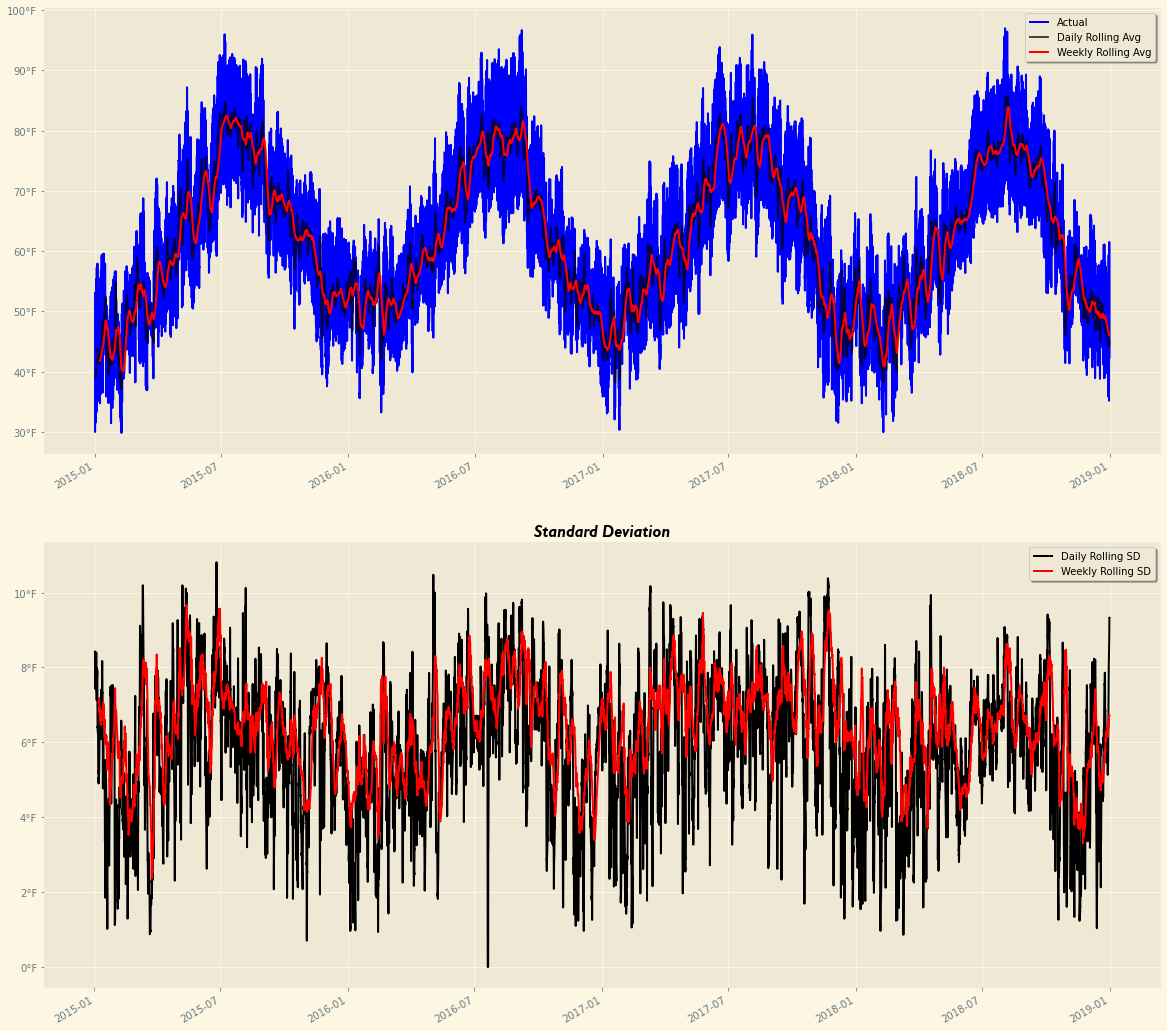

In [14]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,20))

###Plot Data###
#Raw Data
timeseries_plot(df['temp'],legend = True,label = 'Actual', color = 'b',ax =ax[0])

#Rolling Averages
timeseries_plot(df['temp'].rolling(24,24).mean(),legend = True,label = 'Daily Rolling Avg', 
                color = 'black',alpha = .7,ax =ax[0])
timeseries_plot(df['temp'].rolling(24*7,24*7).mean(),legend = True,label = 'Weekly Rolling Avg',
                color = 'r',ax =ax[0])

#Rolling Standard Deviations
timeseries_plot(df['temp'].rolling(24,24).std(), legend = True,label = 'Daily Rolling SD',
                color = 'black',ax =ax[1])
timeseries_plot(df['temp'].rolling(24*7,24*7).std(),title='Standard Deviation', title_dict=font_title,
                legend = True,label = 'Weekly Rolling SD',color = 'r',ax =ax[1])

###Plot Aesthetics###
#Axes
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

**Autocorrelation Plot**

Text(0.5, 1.0, 'Temperature Autocorrelation')

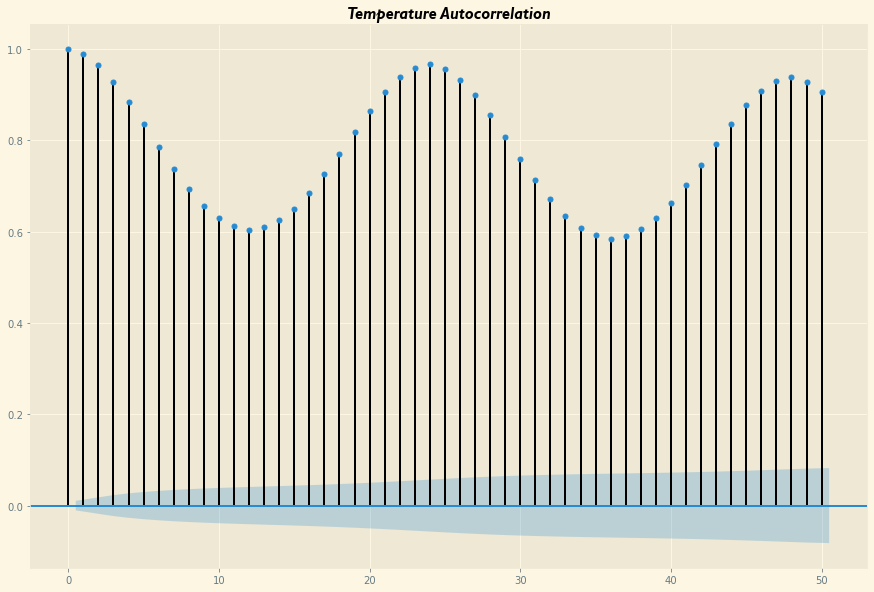

In [15]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf

#Set plot
f, ax = plt.subplots(figsize = (15,10))

#Fit to data
plot_acf(df['temp'], lags = 50, ax = ax),

###Set plot aesthetics###
#Title
ax.set_title('Temperature Autocorrelation', fontdict = font_title)

**Decomposition model**

We'll shorten dataset to 30 days to get a better view of seasonality

In [16]:
#Import decomposition model
from statsmodels.tsa.seasonal import seasonal_decompose

#Fit seasonal_decompose to data and store resutls
result = seasonal_decompose(df.temp.values, model='additive',freq = 24)
tightened_result = seasonal_decompose(df.temp.values[:24*30], model='additive',freq = 24)

trend = result.trend
noise = result.resid
observed = result.observed

seasonal = tightened_result.seasonal

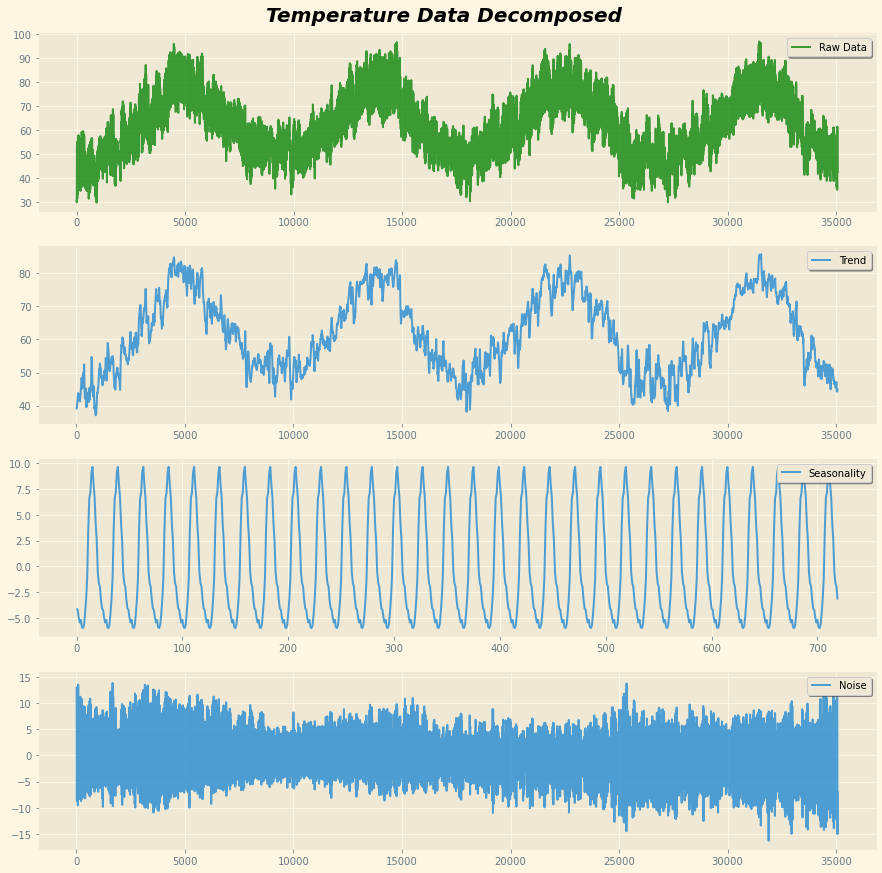

In [17]:
plt.figure(figsize=(15,15))

plt.suptitle('Temperature Data Decomposed', y = .905, fontsize = 20,fontweight = 'bold', style = 'italic')


plt.subplot(411)
plt.plot(observed, label='Raw Data', color = 'g', alpha = .75)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(412)
plt.plot(trend, label='Trend',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(414)
plt.plot(noise, label='Noise',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

## Electricity Load 

**Time plots with smoothing**

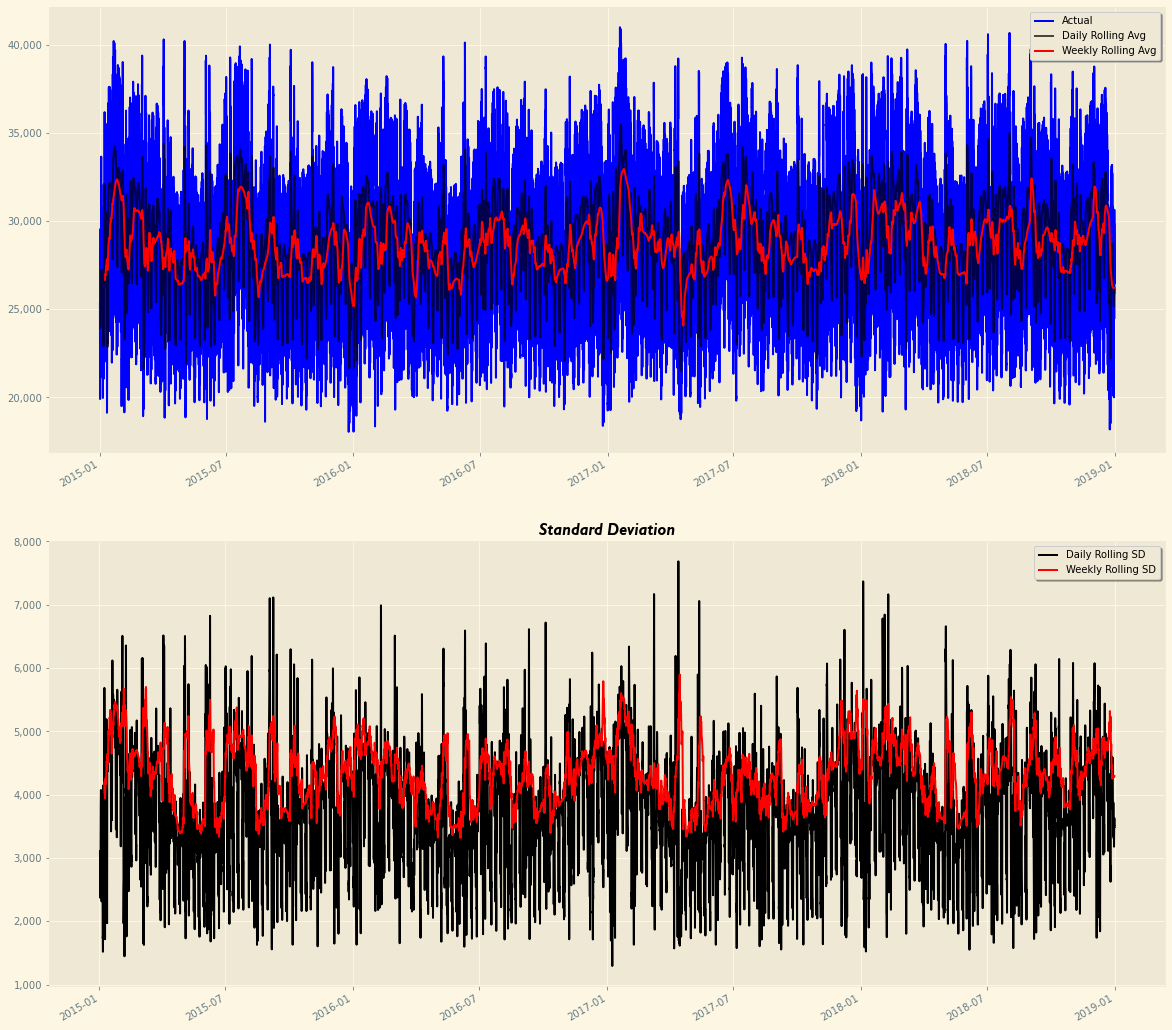

In [18]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,20))

###Plot Data###
#Raw Data
timeseries_plot(df['total_load_actual'],legend = True,label = 'Actual', color = 'b',ax =ax[0])

#Rolling Averages
timeseries_plot(df['total_load_actual'].rolling(24,24).mean(),legend = True,label = 'Daily Rolling Avg', 
                color = 'black',alpha = .7,ax =ax[0])
timeseries_plot(df['total_load_actual'].rolling(24*7,24*7).mean(),legend = True,label = 'Weekly Rolling Avg',
                color = 'r',ax =ax[0])

#Rolling Standard Deviations
timeseries_plot(df['total_load_actual'].rolling(24,24).std(), legend = True,label = 'Daily Rolling SD',
                color = 'black',ax =ax[1])
timeseries_plot(df['total_load_actual'].rolling(24*7,24*7).std(),title='Standard Deviation', title_dict=font_title,
                legend = True,label = 'Weekly Rolling SD',color = 'r',ax =ax[1])

###Plot Aesthetics###
#Axes
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

**Autocorrelation Plot**

Text(0.5, 1.0, 'Electricity Load Autocorrelation')

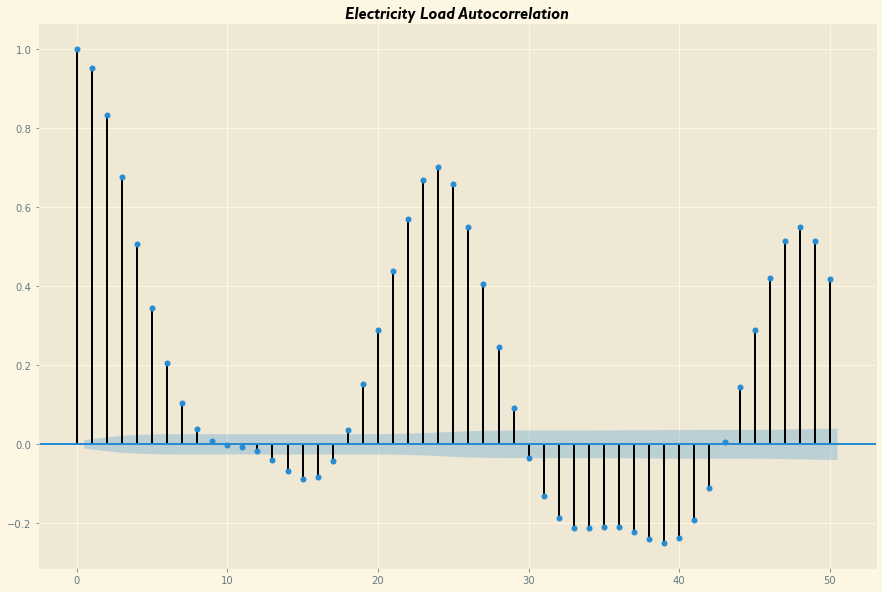

In [19]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf

#Set plot
f, ax = plt.subplots(figsize = (15,10))

#Fit to data
plot_acf(df['total_load_actual'], lags = 50, ax = ax),

###Set plot aesthetics###
#Title
ax.set_title('Electricity Load Autocorrelation', fontdict = font_title)

**Decomposition model**

We'll shorten dataset to 30 days to get a better view of seasonality

In [20]:
#Import decomposition model
from statsmodels.tsa.seasonal import seasonal_decompose

#Fit seasonal_decompose to data and store resutls
result = seasonal_decompose(df.total_load_actual.values, model='additive',freq = 24)
tightened_result = seasonal_decompose(df.total_load_actual.values[:24*30], model='additive',freq = 24)

trend = result.trend
noise = result.resid
observed = result.observed

seasonal = tightened_result.seasonal

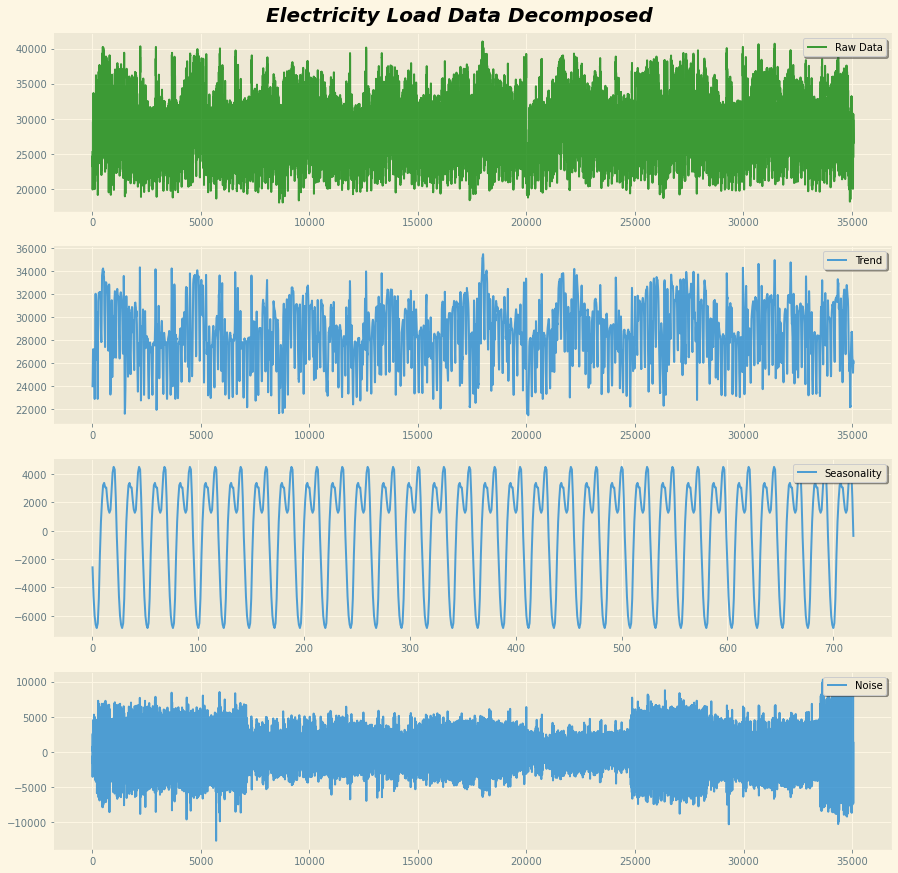

In [21]:
plt.figure(figsize=(15,15))

plt.suptitle('Electricity Load Data Decomposed', y = .905, fontsize = 20,fontweight = 'bold', style = 'italic')


plt.subplot(411)
plt.plot(observed, label='Raw Data', color = 'g', alpha = .75)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(412)
plt.plot(trend, label='Trend',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')

plt.subplot(414)
plt.plot(noise, label='Noise',alpha = .8)
plt.legend(fancybox = True, shadow = True, frameon = True,loc='upper right')